In [34]:
import torch
from torch import nn
from torch.optim import Adam, lr_scheduler
from matplotlib import pyplot as plt
from time import sleep
import numpy as np

In [17]:
true_params = torch.tensor([2., 80.])
X = torch.cat([torch.ones(10,1), torch.arange(10).view(-1,1)], dim=1)
Y = (true_params * X).sum(axis=1, keepdims=True)

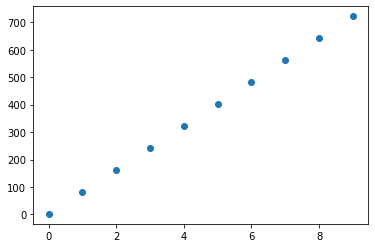

In [18]:
plt.scatter(X[:,1], Y[:,0])

In [19]:
lr = .1
model = nn.Linear(1, 1, bias=True)
optimizer = Adam(model.parameters(), lr=lr)
lambda1 = lambda epoch: 0.95
scheduler = lr_scheduler.MultiplicativeLR(optimizer=optimizer, lr_lambda=lambda1)
loss = torch.nn.MSELoss()

In [20]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.1,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False,
   'initial_lr': 0.1,
   'params': [0, 1]}]}

In [21]:
scheduler.state_dict()

{'base_lrs': [0.1],
 'last_epoch': 0,
 '_step_count': 1,
 'verbose': False,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.1],
 'lr_lambdas': [None]}

In [22]:
lrs, losses = [], []

In [23]:
for epoch in range(1000):
    Y_hat = model(X[:,1].view(-1,1))
    loss_ = loss(Y, Y_hat)
    optimizer.zero_grad()
    loss_.backward()
    
    optimizer.step()
    
    scheduler.step()
    
    losses.append(loss_.item())
    lrs.append(optimizer.state_dict()["param_groups"][0]["lr"])
#     print(loss_.item(), optimizer.state_dict()["param_groups"][0]["lr"])
#     sleep(1)

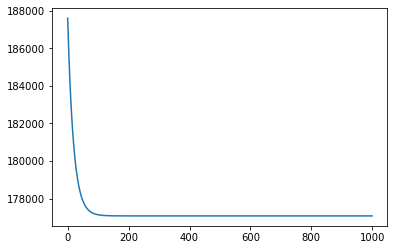

In [24]:
plt.plot(losses)

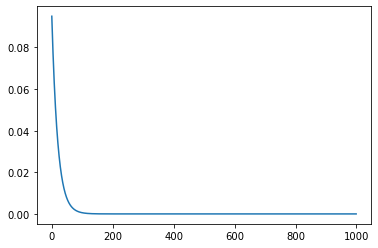

In [25]:
plt.plot(lrs)

In [45]:
lr = .1
model = nn.Linear(1, 1, bias=True)
optimizer = Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer=optimizer, step_size=100, gamma=.99)
loss = torch.nn.MSELoss()

In [46]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.1,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False,
   'initial_lr': 0.1,
   'params': [0, 1]}]}

In [47]:
scheduler.state_dict()

{'step_size': 100,
 'gamma': 0.99,
 'base_lrs': [0.1],
 'last_epoch': 0,
 '_step_count': 1,
 'verbose': False,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.1]}

In [48]:
lrs, losses = [], []

In [49]:
for epoch in range(1000):
    Y_hat = model(X[:,1].view(-1,1))
    loss_ = loss(Y, Y_hat)
    optimizer.zero_grad()
    loss_.backward()
    
    optimizer.step()
    
    scheduler.step()
    
    losses.append(loss_.item())
    lrs.append(optimizer.state_dict()["param_groups"][0]["lr"])
#     print(loss_.item(), optimizer.state_dict()["param_groups"][0]["lr"])
#     sleep(1)

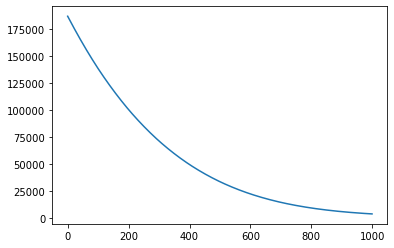

In [50]:
plt.plot(losses)

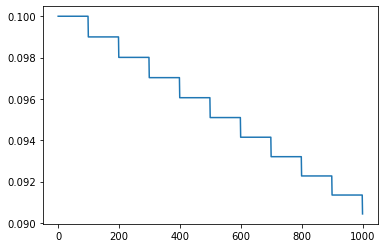

In [51]:
plt.plot(lrs)

In [52]:
np.unique(lrs)[::-1]

array([0.1       , 0.099     , 0.09801   , 0.0970299 , 0.0960596 ,
       0.095099  , 0.09414801, 0.09320653, 0.09227447, 0.09135172,
       0.09043821])